In [3]:
import torch
from torch import nn
from torch import optim
from torchvision.transforms import transforms
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
import warnings



In [4]:
warnings.filterwarnings("ignore")

transform = transforms.Compose([
                                transforms.Resize((32, 32)),#resise the image so theereis not large number of weights .
                                transforms.ToTensor()
])



torch.Size([3, 32, 32])


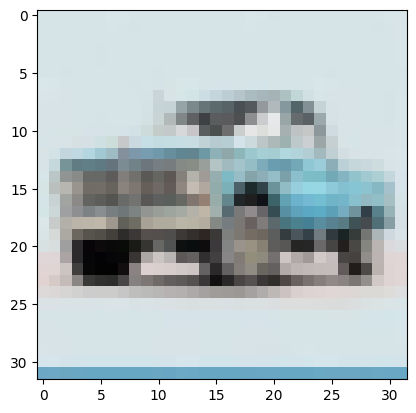

In [5]:
flat_img = 3072  # 32*32*3 

img = Image.open('truck.jpeg')
real_img = transform(img)

torch.manual_seed(2)
fake_img = torch.rand(1, 100)

plt.imshow(np.transpose(real_img.numpy(), (1, 2, 0)))
print(real_img.size())

In [13]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(flat_img, 10000),
        nn.ReLU(),
        nn.Linear(10000, 1),
        nn.Sigmoid()
    )

  def forward(self, img):
    img = img.view(1, -1)
    out = self.linear(img)

    return out

In [14]:


class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(100, 10000),
        nn.LeakyReLU(),
        nn.Linear(10000, 4000),
        nn.LeakyReLU(),
        nn.Linear(4000, flat_img)
    )

  def forward(self, latent_space):
    latent_space = latent_space.view(1, -1)
    out = self.linear(latent_space)

    return out

In [15]:

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

discr = Discriminator().to(device)
gen = Generator().to(device)

opt_d = optim.SGD(discr.parameters(), lr=0.001, momentum=0.9)
opt_g = optim.SGD(gen.parameters(), lr=0.001, momentum=0.9)

criterion = nn.BCELoss()

In [16]:
epochs = 500
discr_e = 4 
gen_e = 3

for epoch in tqdm(range(epochs), total=epochs):

  for k in range(discr_e):
    opt_d.zero_grad()

    out_d1 = discr(real_img.to(device))

    loss_d1 = criterion(out_d1, torch.ones((1, 1)).to(device))
    loss_d1.backward()

    out_d2 = gen(fake_img.to(device)).detach()

    loss_d2 = criterion(discr(out_d2.to(device)), torch.zeros((1, 1)).to(device))
    loss_d2.backward()

    opt_d.step()

  for i in range(gen_e):
    opt_g.zero_grad()
    
    out_g = gen(fake_img.to(device))
    
    loss_g = torch.log(1.0 - (discr(out_g.to(device)))) 
    loss_g.backward()

    opt_g.step()

  0%|          | 0/500 [00:00<?, ?it/s]

In [1]:
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.title("Generated Image")
plt.xticks([])
plt.yticks([])
plt.imshow(np.transpose(out_g.resize(3, 32, 32).cpu().detach().numpy(), (1, 2, 0)))

plt.subplot(1, 2, 2)
plt.title("Original Image")
plt.xticks([])
plt.yticks([])
plt.imshow(np.transpose(real_img.numpy(), (1, 2, 0)))
plt.show()


NameError: name 'plt' is not defined